In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("TeslaDataset.csv")
dataset = df.copy()

In [62]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
prices = dataset['Close']
returns = prices.pct_change()
returns.dropna(inplace = True)
last_price = list(prices)[-1]

In [63]:
num_simulation = 1000
num_days = 365

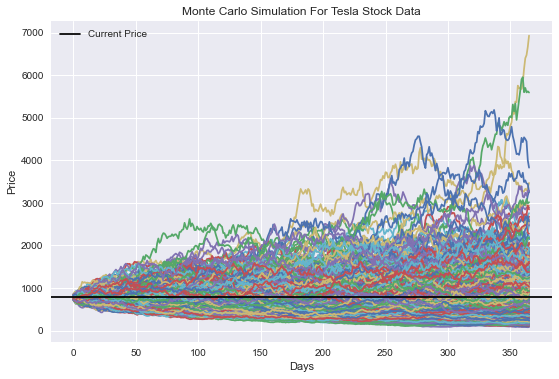

In [73]:
simulation_df = pd.DataFrame()
for x in range(num_simulation):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price *(1+np.random.normal(0,daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        price = price_series[count] * (1 + np.random.normal(0,daily_vol))
        price_series.append(price)
        count += 1
    simulation_df[x] = price_series
    
plt.style.use('seaborn')
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(simulation_df)
ax.set_xlabel("Days")
ax.set_ylabel("Price")
ax.set_title("Monte Carlo Simulation For Tesla Stock Data",fontsize = 12)
ax.axhline(y = last_price,color = 'k',linestyle = 'solid',label = 'Current Price')
plt.legend()
plt.show()

fig.savefig('Monte-Carlo-OP.png',dpi=300)